In [1]:
import pandas as pd
from scipy import stats

#data
data = {
    "Age Group": ["30 - 39", "40 - 49", "30 - 39", "30 - 39", "18 - 29", "18 - 29", "30 - 39", "30 - 39", "30 - 39", "18 - 29", "30 - 39", "18 - 29", "18 - 29", "30 - 39", "18 - 29", "18 - 29", "18 - 29", "30 - 39", "18 - 29", "40 - 49", "18 - 29", "30 - 39", "18 - 29", "18 - 29", "18 - 29", "18 - 29"],
    "Years of Professional Experience": ["More than 10 years", "More than 10 years", "4-7 years", "4-7 years", "More than 10 years", "4-7 years", "More than 10 years", "1-3 years", "1-3 years", "1-3 years", "4-7 years", "4-7 years", "1-3 years", "4-7 years", "1-3 years", "Less than 1 year", "4-7 years", "8-10 years", "1-3 years", "More than 10 years", "4-7 years", "8-10 years", "1-3 years", "None", "Less than 1 year", "More than 10 years"],
    "Familiarity with STEM History": ["Somewhat familiar", "Very familiar", "Moderately familiar", "Somewhat familiar", "Somewhat familiar", "Somewhat familiar", "Somewhat familiar", "Moderately familiar", "Moderately familiar", "Somewhat familiar", "Somewhat familiar", "Not familiar", "Somewhat familiar", "Moderately familiar", "Not familiar", "Not familiar", "Not familiar", "Not familiar", "Not familiar", "Somewhat familiar", "Not familiar", "Moderately familiar", "Moderately familiar", "Somewhat familiar", "Somewhat familiar", "Moderately familiar"],
    "Importance of Historical Context": ["Important", "Important", "Important", "Moderately Important", "Not Important", "Slightly Important", "Moderately Important", "Slightly Important", "Moderately Important", "Slightly Important", "Important", "Slightly Important", "Slightly Important", "Slightly Important", "Moderately Important", "Not Important", "Important", "Slightly Important", "Slightly Important", "Important", "Not Important", "Very Important.", "Important", "Slightly Important", "Not Important", "Important"],
}

df = pd.DataFrame(data)

importance_mapping = {
    "Not Important": 1,
    "Slightly Important": 2,
    "Moderately Important": 3,
    "Important": 4,
    "Very Important.": 5
}

df["Importance of Historical Context"] = df["Importance of Historical Context"].map(importance_mapping)

#Descriptive Statistics
descriptive_stats = df["Importance of Historical Context"].describe()

mode = df["Importance of Historical Context"].mode().tolist()

#Percentages for categorical data
age_group_percentages = df["Age Group"].value_counts(normalize=True) * 100
professional_experience_percentages = df["Years of Professional Experience"].value_counts(normalize=True) * 100
familiarity_with_stem_history_percentages = df["Familiarity with STEM History"].value_counts(normalize=True) * 100
descriptive_stats, mode, age_group_percentages, professional_experience_percentages, familiarity_with_stem_history_percentages


(count    26.000000
 mean      2.730769
 std       1.185165
 min       1.000000
 25%       2.000000
 50%       2.500000
 75%       4.000000
 max       5.000000
 Name: Importance of Historical Context, dtype: float64,
 [2],
 18 - 29    53.846154
 30 - 39    38.461538
 40 - 49     7.692308
 Name: Age Group, dtype: float64,
 4-7 years             30.769231
 1-3 years             26.923077
 More than 10 years    23.076923
 Less than 1 year       7.692308
 8-10 years             7.692308
 None                   3.846154
 Name: Years of Professional Experience, dtype: float64,
 Somewhat familiar      42.307692
 Moderately familiar    26.923077
 Not familiar           26.923077
 Very familiar           3.846154
 Name: Familiarity with STEM History, dtype: float64)

In [2]:
#Cross-tabulation
cross_tab = pd.crosstab(index=df["Years of Professional Experience"], columns=df["Importance of Historical Context"], normalize='index') * 100
cross_tab.columns = ["Not Important", "Slightly Important", "Moderately Important", "Important", "Very Important"]
cross_tab


,Not Important,Slightly Important,Moderately Important,Important,Very Important
Years of Professional Experience,,,,,
1-3 years,0.000000,57.142857,28.571429,14.285714,0.0
4-7 years,12.500000,37.500000,12.500000,37.500000,0.0
8-10 years,0.000000,50.000000,0.000000,0.000000,50.0
Less than 1 year,100.000000,0.000000,0.000000,0.000000,0.0
More than 10 years,16.666667,0.000000,16.666667,66.666667,0.0
None,0.000000,100.000000,0.000000,0.000000,0.0


In [3]:
#Age vs. Importance
age_group_importance_mean = df.groupby("Age Group")["Importance of Historical Context"].mean()

#Years vs. Importance
professional_experience_importance_mean = df.groupby("Years of Professional Experience")["Importance of Historical Context"].mean()
age_group_importance_mean, professional_experience_importance_mean

(Age Group
 18 - 29    2.214286
 30 - 39    3.200000
 40 - 49    4.000000
 Name: Importance of Historical Context, dtype: float64,
 Years of Professional Experience
 1-3 years             2.571429
 4-7 years             2.750000
 8-10 years            3.500000
 Less than 1 year      1.000000
 More than 10 years    3.333333
 None                  2.000000
 Name: Importance of Historical Context, dtype: float64)

In [4]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

responses = ["Storytelling enhances learning through engagement.", "Historical figures like Tesla inspire innovation.", "..."]
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower() 
    text = re.sub(r'\[.*?\]', '', text)  
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'\w*\d\w*', '', text) 
    words = text.split() 
    words = [word for word in words if word not in stop_words] 
    return words

processed_responses = [preprocess(response) for response in responses]

#Flatten
all_words = [word for response in processed_responses for word in response]

#most common words
word_counts = Counter(all_words)
common_words = word_counts.most_common(10) 
print(common_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zamor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


[('storytelling', 1), ('enhances', 1), ('learning', 1), ('engagement', 1), ('historical', 1), ('figures', 1), ('like', 1), ('tesla', 1), ('inspire', 1), ('innovation', 1)]


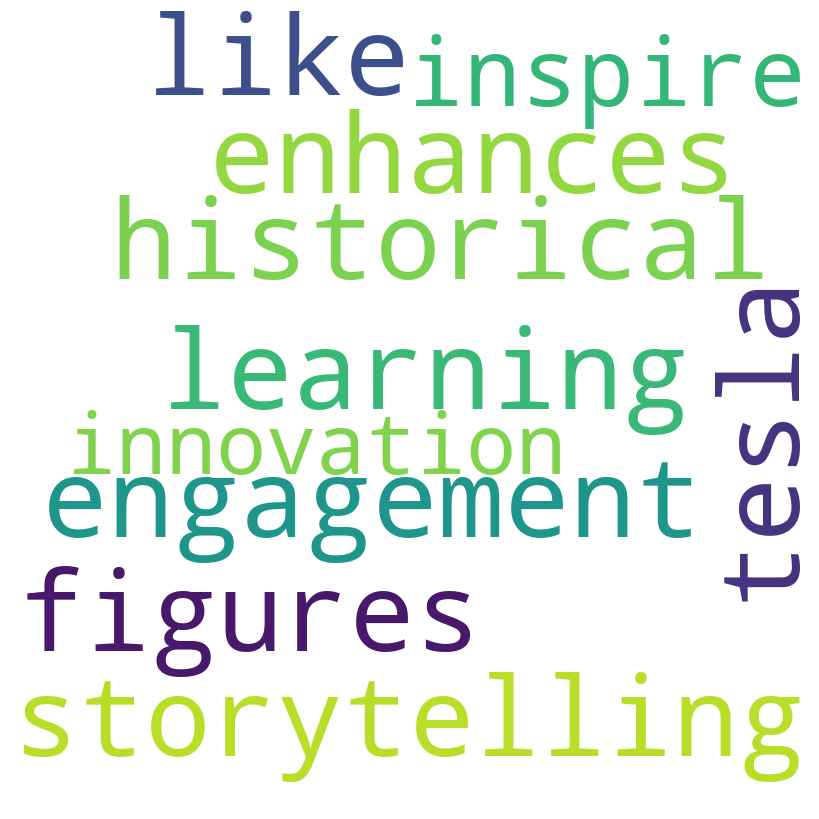

In [8]:
#!pip install wordcloud


from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ['storytelling', 'enhances', 'learning', 'engagement', 'historical', 'figures', 'like', 'tesla', 'inspire', 'innovation']  # Extend this list based on your actual data

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(" ".join(all_words))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


In [9]:
import pandas as pd
from scipy.stats import chi2_contingency, kruskal

data = {
    "Age Group": ["30 - 39", "40 - 49", "30 - 39", "18 - 29"], 
    "Effectiveness of Storytelling": [1, 1, 1, 0], 
    "Years of Professional Experience": ["More than 10 years", "4-7 years", "1-3 years", "Less than 1 year"],  
    "Importance of Historical Context": [4, 3, 2, 1]
}
df = pd.DataFrame(data)

#Chi-Square Test
contingency_table = pd.crosstab(df["Age Group"], df["Effectiveness of Storytelling"])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test")
print("Chi2 Stat:", chi2_stat, "P-value:", p_value)

#Kruskal-Wallis Test
experience_mapping = {
    "Less than 1 year": 1,
    "1-3 years": 2,
    "4-7 years": 3,
    "8-10 years": 4,
    "More than 10 years": 5
}
df["Experience Group"] = df["Years of Professional Experience"].map(experience_mapping)
groups = df.groupby("Experience Group")["Importance of Historical Context"].apply(list)
kruskal_stat, kruskal_p = kruskal(*groups)
print("\nKruskal-Wallis Test")
print("H Statistic:", kruskal_stat, "P-value:", kruskal_p)


Chi-Square Test
Chi2 Stat: 4.0 P-value: 0.1353352832366127

Kruskal-Wallis Test
H Statistic: 3.0 P-value: 0.3916251762710877
